In [152]:
from pathlib import Path
from datetime import datetime

import pandas as pd
import numpy as np
import duckdb

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
stations_daily_csv = Path('./data/stations_daily.csv')
stations_hourly_csv = Path('./data/stations_hourly.csv')
stations_rsinaica_csv = Path('./data/stations_rsinaica.csv')
precipitation_xls = Path('./Precipitacion')

In [3]:
# Question to be answered: What can be the major seasonal changes that we can observe in accordance with Mexico’s climate?

In [4]:
df_daily = pd.read_csv(stations_daily_csv)
df_hourly = pd.read_csv(stations_hourly_csv)
df_rsinaica = pd.read_csv(stations_rsinaica_csv)

In [5]:
df_daily.columns

Index(['datetime', 'station_id', 'PM2.5', 'PM10', 'NOx', 'O3', 'CO', 'HR',
       'NO', 'NO2', 'TMP', 'BEN', 'CH4', 'CN', 'CO2', 'H2S', 'HCNM', 'HCT',
       'HRI', 'IUV', 'PB', 'PP', 'PST', 'RS', 'TMPI', 'UVA', 'XIL'],
      dtype='object')

In [6]:
df_hourly.columns

Index(['datetime', 'station_id', 'PM2.5', 'PM10', 'NOx', 'O3', 'CO', 'HR',
       'NO', 'NO2', 'TMP', 'BEN', 'CH4', 'CN', 'CO2', 'H2S', 'HCNM', 'HCT',
       'HRI', 'IUV', 'PB', 'PP', 'PST', 'RS', 'TMPI', 'UVA', 'XIL'],
      dtype='object')

In [7]:
df_rsinaica.columns

Index(['station_id', 'station_name', 'station_code', 'network_id',
       'network_name', 'network_code', 'street', 'ext', 'interior', 'colonia',
       'zip', 'state_code', 'municipio_code', 'year_started', 'altitude',
       'address', 'date_validated', 'date_validated2', 'passed_validation',
       'video', 'lat', 'lon', 'date_started', 'timezone', 'street_view',
       'video_interior', 'color'],
      dtype='object')

In [8]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231592 entries, 0 to 231591
Data columns (total 27 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   datetime    231592 non-null  object 
 1   station_id  231592 non-null  int64  
 2   PM2.5       161698 non-null  float64
 3   PM10        180481 non-null  float64
 4   NOx         112881 non-null  float64
 5   O3          192957 non-null  float64
 6   CO          175493 non-null  float64
 7   HR          123285 non-null  float64
 8   NO          118154 non-null  float64
 9   NO2         169286 non-null  float64
 10  TMP         127015 non-null  float64
 11  BEN         775 non-null     float64
 12  CH4         270 non-null     float64
 13  CN          595 non-null     float64
 14  CO2         56 non-null      float64
 15  H2S         280 non-null     float64
 16  HCNM        279 non-null     float64
 17  HCT         0 non-null       float64
 18  HRI         10205 non-null   float64
 19  IU

In [9]:
df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5951903 entries, 0 to 5951902
Data columns (total 27 columns):
 #   Column      Dtype  
---  ------      -----  
 0   datetime    object 
 1   station_id  int64  
 2   PM2.5       float64
 3   PM10        float64
 4   NOx         float64
 5   O3          float64
 6   CO          float64
 7   HR          float64
 8   NO          float64
 9   NO2         float64
 10  TMP         float64
 11  BEN         float64
 12  CH4         float64
 13  CN          float64
 14  CO2         float64
 15  H2S         float64
 16  HCNM        float64
 17  HCT         float64
 18  HRI         float64
 19  IUV         float64
 20  PB          float64
 21  PP          float64
 22  PST         float64
 23  RS          float64
 24  TMPI        float64
 25  UVA         float64
 26  XIL         float64
dtypes: float64(25), int64(1), object(1)
memory usage: 1.2+ GB


In [10]:
df_rsinaica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   station_id         341 non-null    int64  
 1   station_name       341 non-null    object 
 2   station_code       341 non-null    object 
 3   network_id         341 non-null    int64  
 4   network_name       334 non-null    object 
 5   network_code       340 non-null    object 
 6   street             187 non-null    object 
 7   ext                154 non-null    object 
 8   interior           74 non-null     object 
 9   colonia            186 non-null    object 
 10  zip                143 non-null    object 
 11  state_code         299 non-null    float64
 12  municipio_code     299 non-null    float64
 13  year_started       138 non-null    float64
 14  altitude           320 non-null    float64
 15  address            138 non-null    object 
 16  date_validated     20 non-

In [11]:
df_hourly.select_dtypes(['int', 'float']).describe()

,station_id,PM2.5,PM10,NOx,O3,CO,HR,NO,NO2,TMP,...,HCT,HRI,IUV,PB,PP,PST,RS,TMPI,UVA,XIL
count,5.951903e+06,4.051918e+06,4.637964e+06,3.046803e+06,4.914802e+06,4.542033e+06,3.388063e+06,3.134901e+06,4.344013e+06,3.467518e+06,...,0.0,777220.000000,108849.000000,2.099985e+06,2.267195e+06,0.0,1.653531e+06,1.378079e+06,375454.000000,18323.000000
mean,1.642267e+02,1.575017e+33,7.423936e+32,3.370523e+00,2.235814e-01,4.293768e+00,2.091774e+02,3.159406e+00,2.309685e+00,2.084149e+01,...,NaN,45.691136,2.882683,6.369050e+02,2.122435e+02,NaN,2.501316e+02,1.953389e+01,9.425129,0.161002
std,8.829978e+01,8.354006e+35,4.069897e+35,3.181981e+03,1.525898e+02,4.671265e+02,2.299328e+05,3.136951e+03,2.664859e+03,6.214520e+02,...,NaN,11.800020,5.113522,5.261369e+02,3.726876e+03,NaN,1.945145e+04,4.802932e+01,19.065279,0.091871
min,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,NaN,7.000000,0.000000,0.000000e+00,0.000000e+00,NaN,0.000000e+00,1.037500e-02,0.000000,0.000000
25%,1.030000e+02,1.100000e+01,2.536100e+01,1.141000e-02,8.000000e-03,4.300000e-01,4.156241e+01,3.000000e-03,8.000000e-03,1.210000e+01,...,NaN,36.700000,0.000000,5.938645e+02,0.000000e+00,NaN,1.000000e+00,1.624000e+01,0.201952,0.096000
50%,1.370000e+02,1.800000e+01,4.108353e+01,2.200000e-02,1.970710e-02,7.200000e-01,6.297000e+01,7.280000e-03,1.520973e-02,1.763626e+01,...,NaN,43.700000,0.254167,6.235941e+02,0.000000e+00,NaN,3.800000e+01,1.789000e+01,2.600133,0.160600
75%,2.450000e+02,2.900000e+01,6.500000e+01,4.276215e-02,3.579000e-02,1.270000e+00,7.900000e+01,2.190000e-02,2.500000e-02,2.309000e+01,...,NaN,53.600000,3.988889,7.017000e+02,0.000000e+00,NaN,3.860000e+02,2.215500e+01,13.625467,0.209000
max,4.260000e+02,4.924800e+38,2.640400e+38,3.422585e+06,2.023916e+05,6.947900e+05,4.166700e+08,3.422585e+06,3.422585e+06,4.208200e+05,...,NaN,124.870000,117.276343,1.509499e+05,2.218172e+05,NaN,2.500000e+07,2.892800e+04,7035.888579,0.360000


In [12]:
df_daily.select_dtypes(['int', 'float']).describe()

,station_id,PM2.5,PM10,NOx,O3,CO,HR,NO,NO2,TMP,...,HCT,HRI,IUV,PB,PP,PST,RS,TMPI,UVA,XIL
count,231592.000000,1.616980e+05,1.804810e+05,1.128810e+05,192957.000000,175493.000000,1.232850e+05,1.181540e+05,1.692860e+05,127015.000000,...,0.0,10205.000000,4936.000000,91738.000000,75346.000000,0.0,7.550700e+04,34385.000000,16090.000000,775.000000
mean,169.260942,2.226160e+33,1.307211e+33,2.853819e+01,0.405834,5.589823,2.277640e+02,2.712090e+01,1.896445e+01,24.111527,...,NaN,51.672491,3.292230,638.512285,289.717806,NaN,2.576214e+02,21.619134,9.618918,0.160362
std,92.487547,5.500417e+35,3.680391e+35,9.493952e+03,121.093397,336.347484,5.022662e+04,9.279685e+03,7.752592e+03,626.585152,...,NaN,14.434358,4.691052,531.870733,3381.823375,NaN,3.818544e+03,49.563922,11.173551,0.040744
min,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,NaN,10.625000,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.028861,0.000000,0.000000
25%,93.000000,1.290000e+01,3.187417e+01,1.415417e-02,0.018483,0.531426,4.344420e+01,4.891667e-03,9.441667e-03,15.920833,...,NaN,40.600000,1.669847,594.452532,0.000000,NaN,1.278333e+02,18.590417,4.826148,0.148062
50%,141.000000,1.960000e+01,4.738759e+01,2.396125e-02,0.025333,0.791667,5.752618e+01,1.002175e-02,1.600592e-02,19.181694,...,NaN,52.145833,2.596838,623.954918,0.000000,NaN,1.923212e+02,21.083125,7.958869,0.164625
75%,256.000000,2.811156e+01,6.767537e+01,3.937500e-02,0.033375,1.202778,6.912458e+01,2.020833e-02,2.477273e-02,22.960761,...,NaN,63.829167,3.578432,703.270833,0.001667,NaN,2.660833e+02,23.195750,11.425276,0.181533
max,426.000000,1.806160e+38,1.412893e+38,3.189756e+06,53185.473851,84087.353799,1.736131e+07,3.189756e+06,3.189756e+06,202409.533333,...,NaN,104.041583,49.026343,146623.557916,221817.210000,NaN,1.041948e+06,8268.433333,639.626234,0.273958


In [13]:
df_rsinaica.select_dtypes(['int', 'float']).describe()

,station_id,network_id,state_code,municipio_code,year_started,altitude,passed_validation,lat,lon
count,341.000000,341.000000,299.000000,299.000000,138.000000,320.000000,162.000000,316.000000,316.000000
mean,219.340176,83.404692,6.020067,326.083612,2003.840580,715.962500,0.623457,22.515928,-101.533455
std,117.191454,33.861055,8.678810,585.483512,6.168257,990.061135,2.484775,4.235773,5.042314
min,30.000000,30.000000,0.000000,0.000000,1988.000000,0.000000,0.000000,16.699340,-117.519444
25%,116.000000,58.000000,0.000000,0.000000,2001.000000,0.000000,0.000000,19.479811,-103.360871
50%,212.000000,79.000000,0.000000,0.000000,2003.000000,0.000000,0.000000,20.628460,-99.793614
75%,322.000000,119.000000,10.000000,286.000000,2010.000000,1760.000000,0.000000,25.539184,-99.001250
max,426.000000,149.000000,30.000000,2190.000000,2013.000000,3082.000000,12.000000,34.570000,-89.624811


In [14]:
df_daily.isna().sum()

datetime           0
station_id         0
PM2.5          69894
PM10           51111
NOx           118711
O3             38635
CO             56099
HR            108307
NO            113438
NO2            62306
TMP           104577
BEN           230817
CH4           231322
CN            230997
CO2           231536
H2S           231312
HCNM          231313
HCT           231592
HRI           221387
IUV           226656
PB            139854
PP            156246
PST           231592
RS            156085
TMPI          197207
UVA           215502
XIL           230817
dtype: int64

In [15]:
df_hourly.isna().sum()

datetime            0
station_id          0
PM2.5         1899985
PM10          1313939
NOx           2905100
O3            1037101
CO            1409870
HR            2563840
NO            2817002
NO2           1607890
TMP           2484385
BEN           5933580
CH4           5947689
CN            5939258
CO2           5950584
H2S           5947229
HCNM          5947525
HCT           5951903
HRI           5174683
IUV           5843054
PB            3851918
PP            3684708
PST           5951903
RS            4298372
TMPI          4573824
UVA           5576449
XIL           5933580
dtype: int64

In [16]:
df_rsinaica.isna().sum()

station_id             0
station_name           0
station_code           0
network_id             0
network_name           7
network_code           1
street               154
ext                  187
interior             267
colonia              155
zip                  198
state_code            42
municipio_code        42
year_started         203
altitude              21
address              203
date_validated       321
date_validated2      198
passed_validation    179
video                286
lat                   25
lon                   25
date_started         149
timezone               0
street_view          289
video_interior       303
color                  0
dtype: int64

In [17]:
df_rsinaica.head()

,station_id,station_name,station_code,network_id,network_name,network_code,street,ext,interior,colonia,...,date_validated2,passed_validation,video,lat,lon,date_started,timezone,street_view,video_interior,color
0,397,"CENICA 1, UAM Iztapalapa",CEN,144,NaN,ESTSP,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,19.489583,-98.801083,2002-01-01,"Tiempo del centro, UTC-6 (UTC-5 en verano)",NaN,NaN,Others
1,344,C. Salud Tlaxcoapán,TCP,127,NaN,TCP,NaN,NaN,NaN,NaN,...,NaN,NaN,Array,20.091472,-99.228417,NaN,"Tiempo del centro, UTC-6 (UTC-5 en verano)",NaN,NaN,Others
2,365,Costa Baja,UM,140,NaN,LAP,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2010-03-14,"Tiempo del centro, UTC-6 (UTC-5 en verano)",NaN,NaN,Others
3,393,Unidad Móvil de Hidalgo,UMHI,143,NaN,POP,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,19.489583,-98.801083,2013-05-24,"Tiempo del centro, UTC-6 (UTC-5 en verano)",NaN,NaN,Others
4,394,Unidad Móvil Iztapalapa,UMIZ,143,NaN,POP,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,19.489583,-98.801083,2013-05-21,"Tiempo del centro, UTC-6 (UTC-5 en verano)",NaN,NaN,Others


In [18]:
# https://datos.bancomundial.org/indicator/AG.LND.PRCP.MM?end=2021&start=1961&view=chart

In [19]:
gdl_station_ids = df_rsinaica.loc[df_rsinaica['network_name'] == 'Guadalajara']['station_id'].to_list()

In [20]:
df_daily_gdl = df_daily\
    .where(df_daily['station_id'].isin(gdl_station_ids))\
        .dropna(how='all')

In [21]:
df_daily.columns

Index(['datetime', 'station_id', 'PM2.5', 'PM10', 'NOx', 'O3', 'CO', 'HR',
       'NO', 'NO2', 'TMP', 'BEN', 'CH4', 'CN', 'CO2', 'H2S', 'HCNM', 'HCT',
       'HRI', 'IUV', 'PB', 'PP', 'PST', 'RS', 'TMPI', 'UVA', 'XIL'],
      dtype='object')

In [22]:
df_daily_gdl.shape

(17845, 27)

In [23]:
df_daily_gdl.isna().sum()

datetime          0
station_id        0
PM2.5         13561
PM10           4216
NOx           10208
O3             1623
CO             5570
HR             9080
NO             9337
NO2            5066
TMP           10658
BEN           17845
CH4           17845
CN            17318
CO2           17845
H2S           17845
HCNM          17845
HCT           17845
HRI           17845
IUV           17845
PB            17845
PP            10465
PST           17845
RS            16427
TMPI           8446
UVA           17845
XIL           17845
dtype: int64

In [24]:
non_null_cols = [
    'datetime', 'station_id', 'PM2.5',
    'PM10', 'NOx', 'O3',
    'CO', 'HR', 'NO',
    'NO2', 'TMP', 'PP',
    'RS', 'TMPI'
    ]

<Axes: >

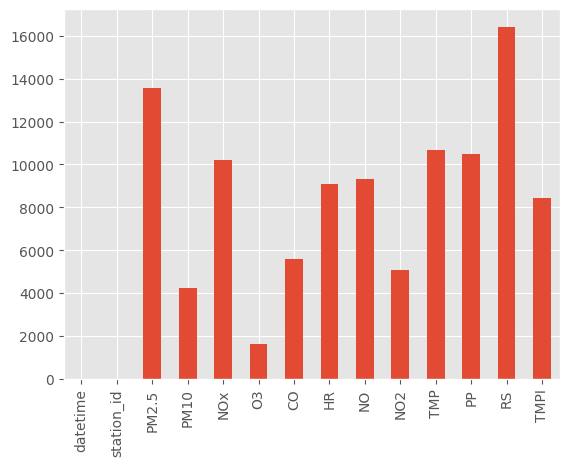

In [25]:
df_daily_gdl[non_null_cols].isnull().sum().plot.bar()

In [26]:
df_daily_gdl

,datetime,station_id,PM2.5,PM10,NOx,O3,CO,HR,NO,NO2,...,HCT,HRI,IUV,PB,PP,PST,RS,TMPI,UVA,XIL
59820,2000-01-01,102.0,NaN,NaN,NaN,NaN,NaN,NaN,0.017875,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59821,2000-01-02,102.0,NaN,NaN,NaN,NaN,NaN,NaN,0.016750,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59822,2000-01-03,102.0,NaN,NaN,NaN,NaN,NaN,NaN,0.018087,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59823,2000-01-04,102.0,NaN,NaN,NaN,NaN,NaN,NaN,0.074958,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59824,2000-01-05,102.0,NaN,NaN,NaN,NaN,NaN,NaN,0.118000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77660,2021-12-27,109.0,8.225983,66.566000,NaN,0.025733,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.690250,NaN,NaN
77661,2021-12-28,109.0,8.235446,56.851458,NaN,0.025024,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.749792,NaN,NaN
77662,2021-12-29,109.0,NaN,49.268292,NaN,0.025737,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.689625,NaN,NaN
77663,2021-12-30,109.0,NaN,82.356375,NaN,0.023931,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.901833,NaN,NaN


### Obtaining dimension tables from csv file rsinaica

In [27]:
station_dim_table = duckdb.sql("""
    SELECT
       station_id,
       station_code,
       station_name,
       network_name,
       lat,
       lon
    FROM df_rsinaica
""").to_df()

### Mapping weather seasons to air quality data based on datetime

In [28]:
df_daily['datetime'] = pd.to_datetime(df_daily['datetime'])

In [29]:
df_hourly['datetime'] = pd.to_datetime(df_daily['datetime'])

In [30]:
df_daily_w_seasons = duckdb.sql("""
    SELECT
        *,
        CASE
            WHEN datetime BETWEEN DATE_TRUNC('year', datetime)
                            AND DATE_TRUNC('year', datetime) + INTERVAL '2 months 18 days'
            THEN 'WINTER'

            WHEN datetime BETWEEN DATE_TRUNC('year', datetime) + INTERVAL '2 months 19 days'
                            AND DATE_TRUNC('year', datetime) + INTERVAL '5 months 19 days'
            THEN 'SPRING'

            WHEN datetime BETWEEN DATE_TRUNC('year', datetime) + INTERVAL '5 months 20 days'
                            AND DATE_TRUNC('year', datetime) + INTERVAL '8 months 21 days'
            THEN 'SUMMER'

            WHEN datetime BETWEEN DATE_TRUNC('year', datetime) + INTERVAL '8 months 22 days'
                            AND DATE_TRUNC('year', datetime) + INTERVAL '11 months 19 days'
            THEN 'FALL'

            WHEN datetime BETWEEN DATE_TRUNC('year', datetime) + INTERVAL '11 months 20 days'
                            AND DATE_TRUNC('year', datetime) + INTERVAL '11 months 31 days'
            THEN 'WINTER'

            ELSE NULL
        END AS season
    FROM df_daily;
""").to_df()


In [ ]:
df_hourly_w_seasons = duckdb.sql("""
    SELECT
        *,
        CASE
            WHEN datetime BETWEEN DATE_TRUNC('year', datetime)
                            AND DATE_TRUNC('year', datetime) + INTERVAL '2 months 18 days'
            THEN 'WINTER'

            WHEN datetime BETWEEN DATE_TRUNC('year', datetime) + INTERVAL '2 months 19 days'
                            AND DATE_TRUNC('year', datetime) + INTERVAL '5 months 19 days'
            THEN 'SPRING'

            WHEN datetime BETWEEN DATE_TRUNC('year', datetime) + INTERVAL '5 months 20 days'
                            AND DATE_TRUNC('year', datetime) + INTERVAL '8 months 21 days'
            THEN 'SUMMER'

            WHEN datetime BETWEEN DATE_TRUNC('year', datetime) + INTERVAL '8 months 22 days'
                            AND DATE_TRUNC('year', datetime) + INTERVAL '11 months 19 days'
            THEN 'FALL'

            WHEN datetime BETWEEN DATE_TRUNC('year', datetime) + INTERVAL '11 months 20 days'
                            AND DATE_TRUNC('year', datetime) + INTERVAL '11 months 31 days'
            THEN 'WINTER'

            ELSE NULL
        END AS season
    FROM df_daily;
""").to_df()

### Loading precipitation historical data

Comportamiento de la lluvia promedio mensual a nievel estatal y nacional desde 1985 a la fecha medida a través de estaciones convencionales y automáticas

Ultima modificacion del archivo: `2025-04-29T00:00:00Z`

In [32]:
p = Path('./Precipitacion/Precipitacion/')

In [33]:
# Read every excel file, take the year of the file name and put it as new value in column year

map_eng_spa_cols = {
    'ENTIDAD': 'State',
    'ENE': 'January',
    'FEB': 'February',
    'MAR': 'March',
    'ABR': 'April',
    'MAY': 'May',
    'JUN': 'June',
    'JUL': 'July',
    'AGO': 'August',
    'SEP': 'September',
    'OCT': 'October',
    'NOV': 'November',
    'DIC': 'December',
    'ANUAL': 'Yearly'
}

df_rain = pd.DataFrame()

for file in p.glob('*'):
    current_file_year = str(file).split('/')[2][:4]
    current_file_df = pd.read_excel(file, header=1).iloc[:-1]
    current_file_df['YEAR'] = current_file_year
    df_rain = pd.concat([df_rain, current_file_df])

df_rain.rename(columns=map_eng_spa_cols, inplace=True)

#### Enriching station datasets with information about the stations: name, code, etc.

In [34]:
df_daily_enriched = duckdb.sql("""
   SELECT 
      daily.*,
      stations.station_code,
      stations.station_name,
      stations.network_name,
      stations.lat,
      stations.lon
   FROM df_daily_w_seasons daily
   JOIN station_dim_table stations
      ON stations.station_id = daily.station_id;
""").to_df()


df_hourly_enriched = duckdb.sql("""
   SELECT 
      hourly.*,
      stations.station_code,
      stations.station_name,
      stations.network_name,
      stations.lat,
      stations.lon
   FROM df_hourly_w_seasons hourly
   JOIN station_dim_table stations
      ON stations.station_id = hourly.station_id;
""").to_df()

In [35]:
df_daily_enriched['network_name'].unique()

array(['Poza Rica', 'Tulancingo', 'Guerrero', 'Oaxaca', 'Valle de México',
       'Saltillo', 'Monclova', 'Piedras Negras', 'San Miguel de Allende',
       'Abasolo', 'San Luis de la Paz', 'Guanajuato', 'Morelia',
       'Monterrey', 'Aguascalientes', 'Chihuahua', 'Torreón', 'Durango',
       'Celaya', 'Irapuato', 'León', 'Salamanca', 'Atitalaquia',
       'Tepeapulco', 'Huichapan', 'Tepeji', 'Pachuca', 'Guadalajara',
       'Toluca', 'Cuernavaca', 'Tepic', 'Puebla', 'Tlaxcala',
       'Minatitlán'], dtype=object)

In [36]:
df_daily_enriched.loc[df_daily_enriched['network_name'] == 'Guadalajara'][non_null_cols]

,datetime,station_id,PM2.5,PM10,NOx,O3,CO,HR,NO,NO2,TMP,PP,RS,TMPI
86612,2000-01-01,102,NaN,NaN,NaN,NaN,NaN,NaN,0.017875,NaN,NaN,NaN,NaN,NaN
86613,2000-01-02,102,NaN,NaN,NaN,NaN,NaN,NaN,0.016750,NaN,NaN,NaN,NaN,NaN
86614,2000-01-03,102,NaN,NaN,NaN,NaN,NaN,NaN,0.018087,NaN,NaN,NaN,NaN,NaN
86615,2000-01-04,102,NaN,NaN,NaN,NaN,NaN,NaN,0.074958,NaN,NaN,NaN,NaN,NaN
86616,2000-01-05,102,NaN,NaN,NaN,NaN,NaN,NaN,0.118000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104452,2021-12-27,109,8.225983,66.566000,NaN,0.025733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.690250
104453,2021-12-28,109,8.235446,56.851458,NaN,0.025024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.749792
104454,2021-12-29,109,NaN,49.268292,NaN,0.025737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.689625
104455,2021-12-30,109,NaN,82.356375,NaN,0.023931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.901833


In [37]:
df_daily_enriched.loc[df_daily_enriched['network_name'] == 'Monterrey'][non_null_cols]

,datetime,station_id,PM2.5,PM10,NOx,O3,CO,HR,NO,NO2,TMP,PP,RS,TMPI
22347,2017-08-01,424,20.750000,20.538462,NaN,0.020750,NaN,NaN,0.002215,0.002215,NaN,NaN,NaN,NaN
22348,2017-08-02,424,12.200000,36.846154,NaN,0.012200,0.178571,NaN,0.002746,0.002746,NaN,NaN,NaN,NaN
22349,2017-08-03,424,22.647059,30.875000,NaN,0.022647,0.107500,NaN,0.002045,0.002045,NaN,NaN,NaN,NaN
22350,2017-08-04,424,30.466667,45.190476,NaN,0.030467,0.488462,NaN,0.005658,0.005658,NaN,NaN,NaN,NaN
22351,2017-08-05,424,25.476190,45.916667,NaN,0.025476,0.297917,NaN,0.004004,0.004004,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167756,2021-12-27,148,25.583333,75.625000,0.044088,0.029625,1.442917,47.125000,NaN,0.030329,21.897083,0.0,141.458333,NaN
167757,2021-12-28,148,19.500000,69.750000,0.038396,0.023958,1.230417,34.833333,NaN,0.028100,24.104167,0.0,146.875000,NaN
167758,2021-12-29,148,13.166667,52.333333,0.032079,0.022125,1.095000,25.333333,NaN,0.023600,24.195000,0.0,120.500000,NaN
167759,2021-12-30,148,17.833333,57.777778,0.034411,0.033278,1.234444,31.777778,NaN,0.027961,24.956111,0.0,130.416667,NaN


#### Produce long format for precipitation datasets to ease join with daily and hourly datasets

In [38]:
df_rain_value_cols = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October', 'November', 'December']
df_rain_id_cols = ['State', 'YEAR']

In [39]:
df_rain_long = pd.melt(df_rain, id_vars=df_rain_id_cols,  value_vars=df_rain_value_cols)
df_rain_long.rename(columns={'variable': 'Month', 'value':'Precipitation'}, inplace=True)
df_rain_long['Year'] = df_rain_long['YEAR'].astype('int16')

In [40]:
df_rain_long['State'].unique()

array(['AGUASCALIENTES', 'BAJA CALIFORNIA', 'BAJA CALIFORNIA SUR',
       'CAMPECHE', 'COAHUILA', 'COLIMA', 'CHIAPAS', 'CHIHUAHUA',
       'CIUDAD DE MÉXICO', 'DURANGO', 'GUANAJUATO', 'GUERRERO', 'HIDALGO',
       'JALISCO', 'ESTADO DE MÉXICO', 'MICHOACÁN', 'MORELOS', 'NAYARIT',
       'NUEVO LEÓN', 'OAXACA', 'PUEBLA', 'QUERÉTARO', 'QUINTANA ROO',
       'SAN LUIS POTOSÍ', 'SINALOA', 'SONORA', 'TABASCO', 'TAMAULIPAS',
       'TLAXCALA', 'VERACRUZ', 'YUCATÁN', 'ZACATECAS', 'Aguascalientes',
       'Baja California', 'Baja California Sur', 'Campeche', 'Coahuila',
       'Colima', 'Chiapas', 'Chihuahua', 'Ciudad de México', 'Durango',
       'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco', 'Estado de México',
       'Michoacán', 'Morelos', 'Nayarit', 'Nuevo León', 'Oaxaca',
       'Puebla', 'Querétaro', 'Quintana Roo', 'San Luis Potosí',
       'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala',
       'Veracruz', 'Yucatán', 'Zacatecas'], dtype=object)

#### Filtering by cities of interest

In [41]:
df_gdl = duckdb.sql("""
   SELECT
      daily.*,
      rain.State,
      rain.Precipitation
   FROM df_daily_enriched daily
   JOIN df_rain_long rain
      ON monthname(daily.datetime) = rain.Month
   WHERE 
      daily.network_name = 'Guadalajara' AND
      rain.State = 'JALISCO' 
""").to_df()

In [42]:
df_mty = duckdb.sql("""
   SELECT
      daily.*,
      rain.State,
      rain.Precipitation
   FROM df_daily_enriched daily
   JOIN df_rain_long rain
      ON monthname(daily.datetime) = rain.Month
   WHERE 
      daily.network_name = 'Monterrey' AND
      rain.State = 'Nuevo León' 
""").to_df()

In [43]:
df_pue = duckdb.sql("""
   SELECT
      daily.*,
      rain.State,
      rain.Precipitation
   FROM df_daily_enriched daily
   JOIN df_rain_long rain
      ON monthname(daily.datetime) = rain.Month
   WHERE 
      daily.network_name = 'Puebla' AND
      rain.State = 'Puebla' 
""").to_df()

#### Calculating monthly median and mean for pollutants

In [44]:
df_gdl_monthly = duckdb.sql("""
    SELECT
       State,
       network_name,
       YEAR(datetime) AS Year,
       MONTHNAME(datetime) AS Month,
       LOWER(Season) AS Season,
       MEAN("TMP") AS avg_tmp,
       MEDIAN("TMP") AS median_tmp,
       MEAN("PM2.5") AS avg_pm2_5,
       MEDIAN("PM2.5") AS median_pm2_5,
       MEAN("PM10") AS avg_pm10,
       MEDIAN("PM10") AS median_pm10,
       MEAN("O3") AS avg_o3,
       MEDIAN("O3") AS median_o3,
       MEAN("NOx") AS avg_nox,
       MEDIAN("NOx") AS median_nox,
       MEAN("NO") AS avg_no,
       MEDIAN("NO") AS median_no,
       MEAN("NO2") AS avg_no2,
       MEDIAN("NO2") AS median_no2,
       MEAN("CO") AS avg_co,
       MEDIAN("CO") AS median_co,
       MEAN("PP") AS avg_pp,
       MEDIAN("PP") AS median_pp
    FROM df_gdl
    GROUP BY State, network_name, Year, Month, Season
""").to_df()

In [45]:
df_mty_monthly = duckdb.sql("""
    SELECT
       State,
       network_name,
       YEAR(datetime) AS Year,
       MONTHNAME(datetime) AS Month,
       LOWER(Season) AS Season,
       MEAN("TMP") AS avg_tmp,
       MEDIAN("TMP") AS median_tmp,
       MEAN("PM2.5") AS avg_pm2_5,
       MEDIAN("PM2.5") AS median_pm2_5,
       MEAN("PM10") AS avg_pm10,
       MEDIAN("PM10") AS median_pm10,
       MEAN("O3") AS avg_o3,
       MEDIAN("O3") AS median_o3,
       MEAN("NOx") AS avg_nox,
       MEDIAN("NOx") AS median_nox,
       MEAN("NO") AS avg_no,
       MEDIAN("NO") AS median_no,
       MEAN("NO2") AS avg_no2,
       MEDIAN("NO2") AS median_no2,
       MEAN("CO") AS avg_co,
       MEDIAN("CO") AS median_co,
       MEAN("PP") AS avg_pp,
       MEDIAN("PP") AS median_pp
    FROM df_mty
    GROUP BY State, network_name, Year, Month, Season
""").to_df()

In [46]:
df_pue_monthly = duckdb.sql("""
    SELECT
       State,
       network_name,
       YEAR(datetime) AS Year,
       MONTHNAME(datetime) AS Month,
       LOWER(Season) AS Season,
       MEAN("TMP") AS avg_tmp,
       MEDIAN("TMP") AS median_tmp,
       MEAN("PM2.5") AS avg_pm2_5,
       MEDIAN("PM2.5") AS median_pm2_5,
       MEAN("PM10") AS avg_pm10,
       MEDIAN("PM10") AS median_pm10,
       MEAN("O3") AS avg_o3,
       MEDIAN("O3") AS median_o3,
       MEAN("NOx") AS avg_nox,
       MEDIAN("NOx") AS median_nox,
       MEAN("NO") AS avg_no,
       MEDIAN("NO") AS median_no,
       MEAN("NO2") AS avg_no2,
       MEDIAN("NO2") AS median_no2,
       MEAN("CO") AS avg_co,
       MEDIAN("CO") AS median_co,
       MEAN("PP") AS avg_pp,
       MEDIAN("PP") AS median_pp
    FROM df_pue
    GROUP BY State, network_name, Year, Month, Season
""").to_df()

#### Enriching monthly pollution averages and median with monthly precipitation averages from CONAGUA dataset

In [47]:
df_gdl_final = duckdb.sql("""
   SELECT
      monthly.*,
      rain.State,
      rain.Precipitation
   FROM df_gdl_monthly monthly
   JOIN df_rain_long rain
      ON monthly.Year = rain.Year
      AND monthly.Month = rain.Month
      AND monthly.State = rain.State
   WHERE 
      monthly.network_name = 'Guadalajara'
""").to_df()

In [48]:
df_mty_final = duckdb.sql("""
   SELECT
      monthly.*,
      rain.State,
      rain.Precipitation
   FROM df_mty_monthly monthly
   JOIN df_rain_long rain
      ON monthly.Year = rain.Year
      AND monthly.Month = rain.Month
      AND monthly.State = rain.State
   WHERE 
      monthly.network_name = 'Monterrey'
""").to_df()

In [49]:
df_pue_final = duckdb.sql("""
   SELECT
      monthly.*,
      rain.State,
      rain.Precipitation
   FROM df_pue_monthly monthly
   JOIN df_rain_long rain
      ON monthly.Year = rain.Year
      AND monthly.Month = rain.Month
      AND monthly.State = rain.State
   WHERE 
      monthly.network_name = 'Puebla'
""").to_df()

#### Correlational analysis

In [50]:
# S > P
corr_gdl = df_gdl_final.select_dtypes(['float', 'int']).corr('kendall')

In [51]:
corr_gdl['Precipitation'].sort_values(ascending=False)

Precipitation    1.000000
avg_pp           0.649872
median_pp        0.292868
Year             0.112184
avg_tmp          0.092674
median_tmp       0.073137
avg_o3          -0.004167
median_o3       -0.009506
avg_pm2_5       -0.252630
avg_co          -0.269922
median_co       -0.293354
median_nox      -0.299194
median_no2      -0.319535
median_pm2_5    -0.333752
avg_nox         -0.338397
avg_no2         -0.377481
median_no       -0.385984
avg_no          -0.409137
avg_pm10        -0.554595
median_pm10     -0.584193
Name: Precipitation, dtype: float64

In [52]:
# S > P
corr_mty = df_mty_final.select_dtypes(['float', 'int']).corr('kendall')

In [53]:
corr_mty['Precipitation'].sort_values(ascending=False)

Precipitation    1.000000
avg_pp           0.661112
median_tmp       0.576354
avg_tmp          0.542451
avg_o3           0.101710
median_o3        0.067806
median_no        0.044699
median_nox      -0.152564
avg_co          -0.169516
median_co       -0.203419
median_no2      -0.220371
avg_no          -0.223495
avg_nox         -0.339032
avg_no2         -0.339032
median_pm2_5    -0.610257
median_pm10     -0.610257
avg_pm2_5       -0.627209
avg_pm10        -0.644160
Year                  NaN
median_pp             NaN
Name: Precipitation, dtype: float64

In [54]:
# S > P
corr_pue = df_pue_final.select_dtypes(['float', 'int']).corr('kendall')

In [55]:
corr_pue['Precipitation'].sort_values(ascending=False)

Precipitation    1.000000
avg_co          -0.084758
avg_o3          -0.220371
median_o3       -0.237322
avg_pm2_5       -0.305129
median_co       -0.322080
avg_pm10        -0.389887
avg_no          -0.536388
avg_no2         -0.644160
median_no       -0.648136
median_pm2_5    -0.661112
median_pm10     -0.661112
median_no2      -0.711967
median_nox      -0.728918
avg_nox         -0.745870
Year                  NaN
avg_tmp               NaN
median_tmp            NaN
avg_pp                NaN
median_pp             NaN
Name: Precipitation, dtype: float64

In [56]:
df_pue_final['Year'].unique()

array([2021])

In [57]:
mean_values_cols = None
median_values_cols = None

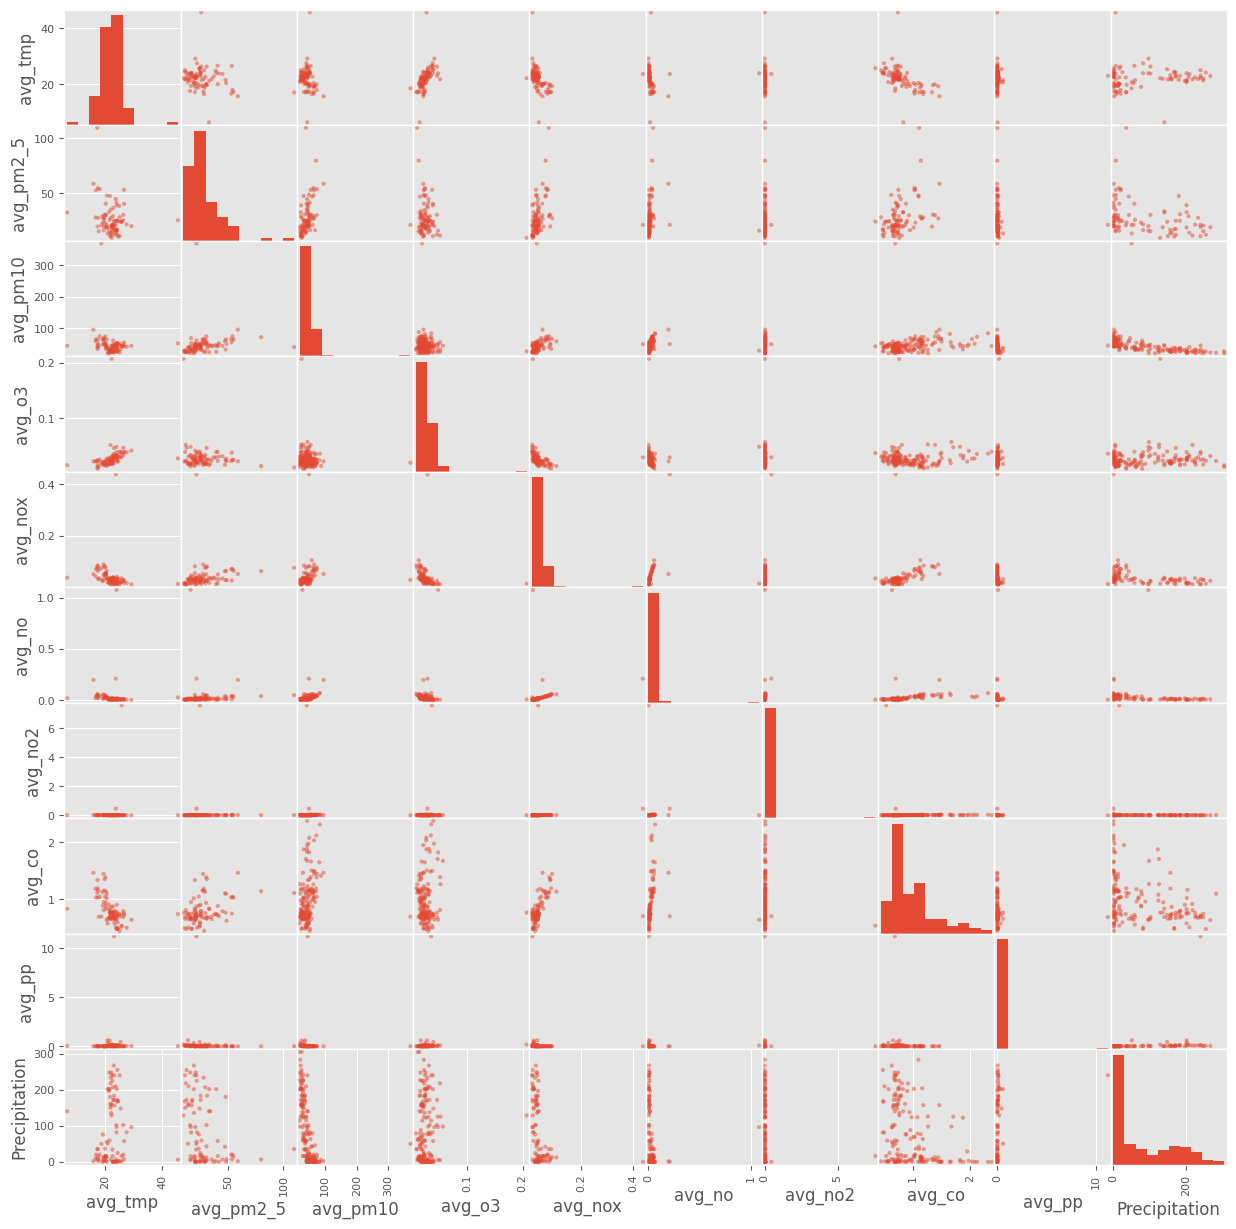

In [58]:
from pandas.plotting import scatter_matrix

mean_values_cols = df_gdl_final.columns.str.contains(pat='^[avg_]', regex=True)
mean_values_cols = [*df_gdl_final.columns[mean_values_cols]]
mean_values_cols.append('Precipitation')

scatter_matrix(
    df_gdl_final[mean_values_cols], 
    figsize=(15, 15));

[False False False False False False  True False  True False  True False
  True False  True False  True False  True False  True False  True False
 False]


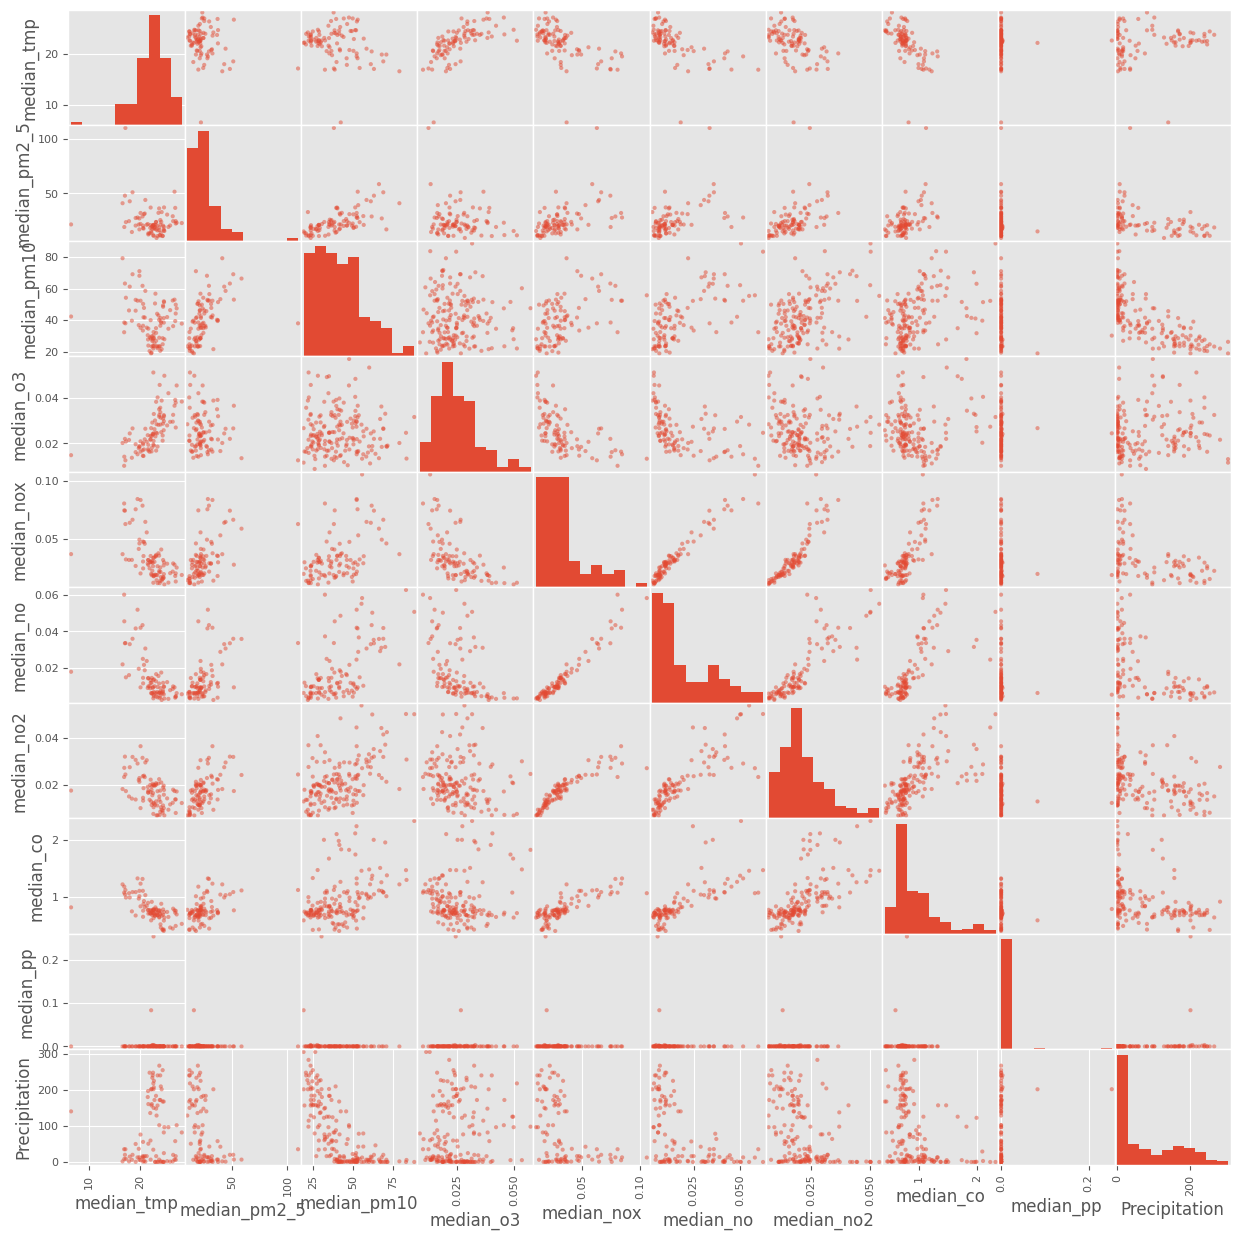

In [59]:
median_values_cols = df_gdl_final.columns.str.contains(pat='^median_', regex=True)
print(median_values_cols)
median_values_cols = [*df_gdl_final.columns[median_values_cols]]
median_values_cols.append('Precipitation')

scatter_matrix(
    df_gdl_final[median_values_cols], 
    figsize=(15, 15));

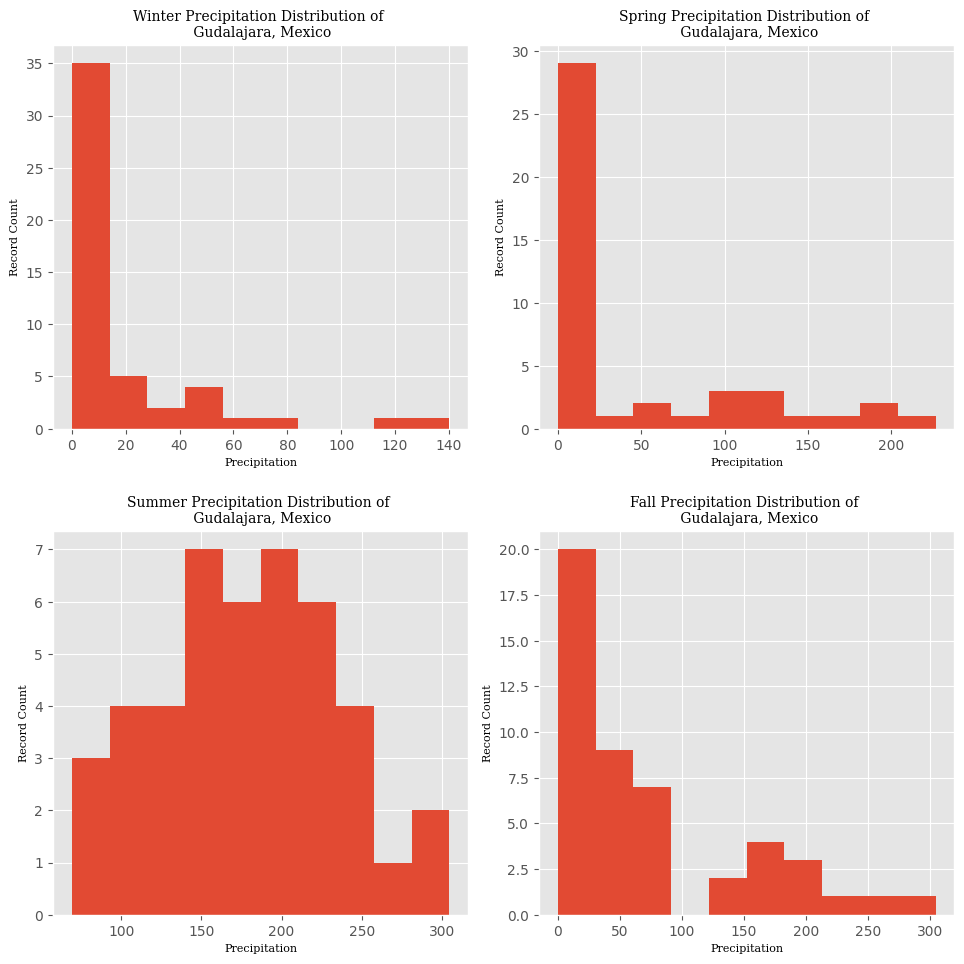

In [60]:
plt.figure(figsize=(10, 10))

axis_font = {
    'family': 'serif',
    'color':  'black',
    'weight': 'normal',
    'size': 8,
    }

title_font = {
    'family': 'serif',
    'color':  'black',
    'weight': 'normal',
    'size': 10,
    }

for season in enumerate(df_gdl_final['Season'].unique(), start=1):
    plt.tight_layout(pad=2)
    plt.subplot(2, 2, season[0])
    plt.hist(df_gdl_final['Precipitation'].loc[(df_gdl_final['Season'] == season[1])])
    plt.xlabel('Precipitation',fontdict=axis_font)
    plt.ylabel('Record Count',fontdict=axis_font)
    plt.title(f'{season[1].capitalize()} Precipitation Distribution of \n Gudalajara, Mexico', fontdict=title_font)

In [92]:
# Calculate the median value of seasonal precipitation

seasonal_median_gdl = duckdb.sql("""
    SELECT
       season,
       MEDIAN(Precipitation) AS seasonal_precipitation_median,
       MEDIAN(median_pm10) AS seasonal_pm10_median,
       MEDIAN(median_pm2_5) AS seasonal_pm2_5_median,
       -- MEAN(Precipitation) AS seasonal_precipitation_mean,
       -- MEDIAN(avg_pm10) AS seasonal_pm10_mean,
       -- STDDEV_POP(Precipitation) AS seasonal_precipitation_stddev_pop,
       STDDEV_SAMP(Precipitation) AS seasonal_precipitation_stddev_samp,
       STDDEV_SAMP(median_pm10) AS seasonal_pm10_stddev_samp,
       STDDEV_SAMP(median_pm2_5) AS seasonal_pm2_5_stddev_samp
    FROM df_gdl_final
    GROUP BY season;
""").to_df()

In [93]:
seasonal_median_gdl

,Season,seasonal_precipitation_median,seasonal_pm10_median,seasonal_pm2_5_median,seasonal_precipitation_stddev_samp,seasonal_pm10_stddev_samp,seasonal_pm2_5_stddev_samp
0,winter,5.815,52.281250,27.370955,29.898432,13.249701,11.099684
1,spring,6.645,44.953750,25.510459,64.305845,8.831751,7.786576
2,summer,181.515,25.592262,16.822917,56.558072,4.740990,3.977211
3,fall,43.470,40.288276,20.120125,78.575371,17.476129,22.232627


In [131]:
seasonal_median_cols = ['Season', 'seasonal_precipitation_median', 'seasonal_pm10_median', 'seasonal_pm2_5_median']
seasonal_stddev_cols = ['Season', 'seasonal_precipitation_stddev_samp', 'seasonal_pm10_stddev_samp', 'seasonal_pm2_5_stddev_samp']
seasonal_median_gdl_long = pd.melt(frame=seasonal_median_gdl[seasonal_median_cols], id_vars='Season', value_vars=seasonal_median_cols)
seasonal_stddev_gdl_long = pd.melt(frame=seasonal_median_gdl[seasonal_stddev_cols], id_vars='Season', value_vars=seasonal_stddev_cols)
seasonal_median_gdl_long.rename(columns={'variable': 'measurement_name', 'value': 'median'}, inplace=True)
seasonal_stddev_gdl_long.rename(columns={'variable': 'stddev_name', 'value': 'stddev'}, inplace=True)

In [132]:
seasonal_median_gdl_long = pd.concat([seasonal_median_gdl_long, seasonal_stddev_gdl_long], axis=1).iloc[:,1:]

In [276]:
seasonal_median_gdl_long['Season'] = seasonal_median_gdl_long['Season'].apply(lambda x: str(x).capitalize())

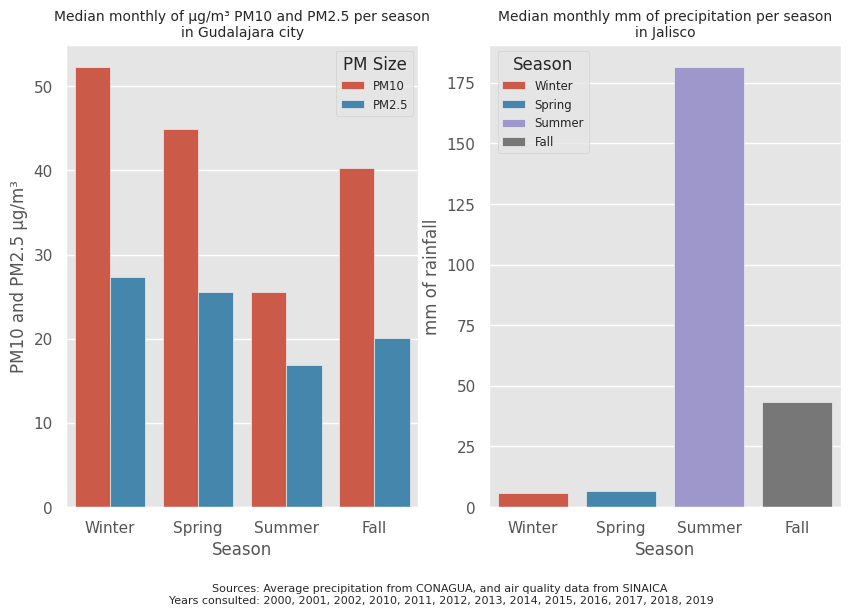

In [ ]:
figure, axes = plt.subplots(ncols=2, figsize=(10, 6))
plt.subplots_adjust(hspace = 30)

sns.barplot(
    seasonal_median_gdl_long.iloc[4:],
    x='Season',
    y='median',
    hue='measurement_name',
    legend='brief',
    ax=axes[0],
    )

sns.barplot(
    seasonal_median_gdl_long.iloc[:4],
    x='Season',
    y='median',
    hue='Season',
    legend='brief',
    ax=axes[1]
    )

sns.move_legend(
    axes[0], "upper left",
    bbox_to_anchor=(.75, 1), ncol=1, title='PM Size', frameon=True,
    fontsize='small', labels=['PM10', 'PM2.5']
)

sns.move_legend(
    axes[1], "best",
    bbox_to_anchor=(.3, 1), ncol=1, title='Season', frameon=True,
    fontsize='small'
)

axes[0].set_title('Median monthly of µg/m³ PM10 and PM2.5 per season\nin Gudalajara city', fontsize=10)
axes[0].set_ylabel('PM10 and PM2.5 µg/m³')
axes[1].set_title('Median monthly mm of precipitation per season\nin Jalisco', fontsize=10)
axes[1].set_ylabel('mm of rainfall')

years_consulted = '2000, 2001, 2002, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019'
plt.figtext(
    0.5, 
    -0.05, 
    f"Sources: Average precipitation from CONAGUA, and air quality data from SINAICA \nYears consulted: {years_consulted}",
    ha="center", 
    fontsize=8
    )
plt.show()


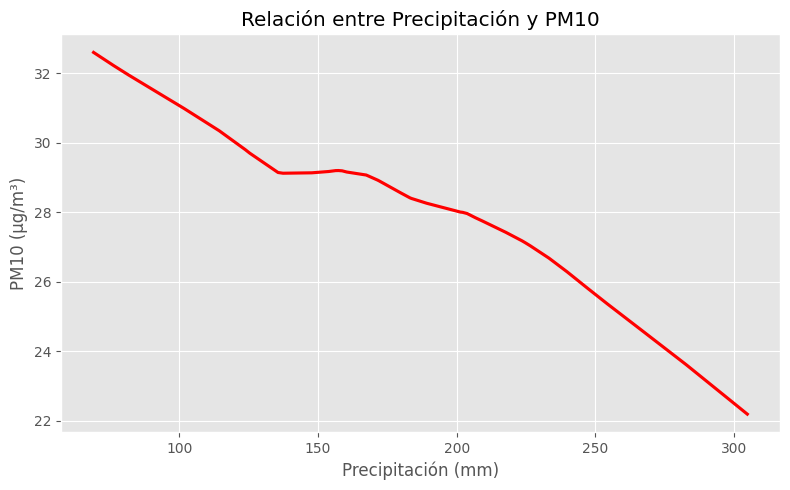

In [306]:
import seaborn as sns

# Filtrar datos
df_filtered = df_gdl_final.loc[(df_gdl_final['Season'] == 'summer')][['Precipitation', 'avg_pm10']].dropna()

# Crear gráfico de dispersión con suavizado
plt.figure(figsize=(8, 5))
sns.regplot(data=df_filtered, x='Precipitation', y='avg_pm10', scatter=False, lowess=True, color='red')

plt.title('Relación entre Precipitación y PM10')
plt.xlabel('Precipitación (mm)')
plt.ylabel('PM10 (µg/m³)')
plt.grid(True)
plt.tight_layout()
plt.show()